In [1]:
import sys
import mysql.connector
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from matplotlib.markers import CARETDOWN
import seaborn as sns
import matplotlib.pylab as pylt
from  matplotlib import cm
import numpy as np
import pandas as pd
import datetime as dt
import os
import math
from statistics import mean,median,stdev
import json
db = mysql.connector.connect(
    host=os.getenv('PROD_MYSQL_HOST'),
    user=os.getenv('PROD_MYSQL_USER'),
    passwd=os.getenv('PROD_MYSQL_PASS'),
    auth_plugin='mysql_native_password',
    port=os.getenv('PROD_MYSQL_PORT'),
    database='webassembly_bugs'
    )
cursor = db.cursor()


FONT_SIZE=12
CB91_Blue = 'blue'
CB91_Green = '#47DBCD'
CB91_Red = 'red'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_DarkGreen = '#85a43a'
CB91_Amber = '#F5B14C'
Light_blue = '#2CBDFE'
Green = '#661D98'
Orange= '#FF8700'
Teal='#22FEFE'
Other_Blue='#3975FE'
Magenta = '#D429FE'
Navy ='#2D0C98'


def makeCompilerLabel(compiler):
    compilerLabels = {
        "emscripten": 'Emscripten',
        "binaryen": 'Binaryen',
        'wasm-bindgen': 'Wasm-Bindgen',
        'asterius': 'Asterius',
        'AssemblyScript': 'AssemblyScript',
        'tinygo': 'TinyGo'
    }
    return compilerLabels[compiler]

def makeStandardFigure(smallSize=True, useColors = True, useShorter=False, useNarrow=False):
    plt.rcdefaults()
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    if smallSize:
        fig_width_pt = 246.0 * 1 #(2 if numOfElements > 50  else 1.5)  # Get this from LaTeX using \showthe\columnwidth
        fixedHeightRatio = 3/16 #* 1.4#
        fig_width = fig_width_pt*inches_per_pt  # width in inches
        fig_height = 246.0 * 2 * inches_per_pt * fixedHeightRatio 
    elif useShorter:
        fig_width_pt = 246.0 * 2 #(2 if numOfElements > 50  else 1.5)  # Get this from LaTeX using \showthe\columnwidth
        golden_mean =  (math.sqrt(3)-1.0)/2.0         # Aesthetic ratio
        fig_width = fig_width_pt*inches_per_pt  # width in inches
        fig_height =  fig_width * golden_mean  * 0.6   # height in inches
    elif useNarrow:
        fig_width_pt = 246.0 * 0.7 #(2 if numOfElements > 50  else 1.5)  # Get this from LaTeX using \showthe\columnwidth
        golden_mean =  (math.sqrt(6)-1.0)/2.0         # Aesthetic ratio
        fig_width = fig_width_pt*inches_per_pt  # width in inches
        fig_height =  fig_width * golden_mean  *1  # height in inches
    else:
        fig_width_pt = 246.0 * 2 #(2 if numOfElements > 50  else 1.5)  # Get this from LaTeX using \showthe\columnwidth
        golden_mean =  (math.sqrt(2.2)-1.0)/2.0         # Aesthetic ratio
        fig_width = fig_width_pt*inches_per_pt  # width in inches
        fig_height =  fig_width * golden_mean     # height in inches
    fig_size =  [fig_width,fig_height]
    plt.rcParams['figure.figsize'] = fig_size
 

    if useColors:
        color_list = [CB91_Blue, CB91_Red, CB91_Green, CB91_Amber, CB91_Purple, CB91_DarkGreen]
        # , Light_blue, Green, Orange,Teal, Other_Blue, Magenta, Navy]
    else:
        color_list = ['black' for i in range(len())]

    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list) +  plt.cycler(linestyle=['-', '--', ':', '-.','-', '--'])
    # ,'-', '--', ':', '-.', '--', ':', '-.'])
    plt.rcParams['axes.xmargin'] = 0.0001
    plt.rcParams['axes.ymargin'] = 0.05

    plt.rcParams['grid.linestyle'] = "--"
    fig = plt.figure()
   
  
    
    ax1 = fig.add_subplot(111)
    plt.xticks(rotation=45,ha="right", rotation_mode="anchor", fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    return fig,ax1

def getStats(values):
    stats =  (mean(values), median(values),stdev(values),min(values),max(values))
    return tuple(map(lambda x: "{0:,.2f}".format(x), stats))
#     {
#         "mean": mean(values),
#         "median": median(values),
#         "stdev": stdev(values),
#         "min": min(values),
#         "max": max(values)
#     }

def getFactors(n):
  factor_values = []
  for i in range(1, n + 1):
    if n % i == 0:
      factor_values.append(i)

statsTableTemplate = '''
\\begin{table}[H]
\\begin{tabular}{@{}cccccc@{}}
\\hline
Compiler & Mean & Median & SD & Min & Max \\\\ \\hline \\hline
%s
 \\hline
\\end{tabular}
\\end{table}
'''

AssemblyScript 24
asterius 5
binaryen 49
emscripten 58
tinygo 17
wasm-bindgen 41


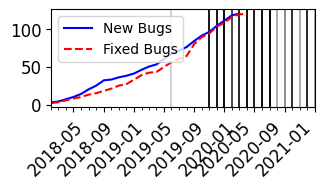

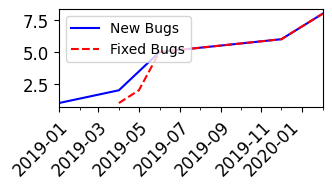

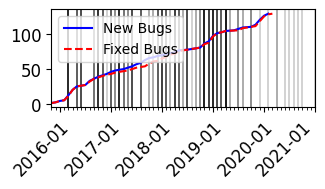

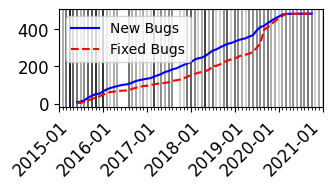

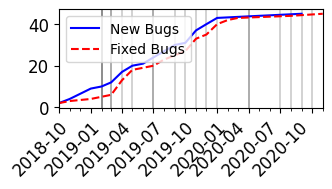

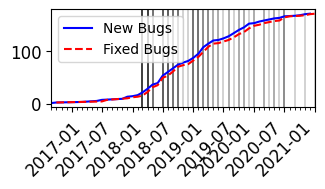

In [2]:
#Plot for times of bugs

def makeFigure(createdDates,createdCounts,closedDates, closedCounts,compiler,releaseDatesDict):
    numOfElements = len(createdDates)
    releaseDates = releaseDatesDict[compiler] if compiler in releaseDatesDict.keys() else []
    
    fig,ax1 = makeStandardFigure(True)
    ax1.xaxis_date()

    formatter = mdates.DateFormatter("%Y-%m")
    ax1.xaxis.set_major_formatter(formatter)
    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())

    for date in releaseDates:
        # ax1.bar(createdDates, , color='black')
        plt.axvline(x=date,color='black',linewidth=0.25)
    
    ax1.plot(createdDates, createdCounts, label='New Bugs')
    ax1.plot(closedDates, closedCounts, label='Fixed Bugs')
    
   
    # plt.xlabel('Date', fontsize=FONT_SIZE)
    # plt.ylabel('# of Bugs', fontsize=FONT_SIZE)
#     plt.title(compiler, y=1.4)
    plt.legend(ncol=1, loc='upper left',fontsize=10)

    return (fig, ax1)


bugCreatedDatesQuery = '''
        SELECT Repo, DATE(date_format(CreatedDate,"%Y-%m-01")) As CreatedDate, COUNT(*) As Counts
         FROM studydataset_issta2021
         WHERE IsRedundant = 0
         GROUP BY Repo, DATE(date_format(CreatedDate,"%Y-%m-01"))
         ORDER BY Repo, CreatedDate;
'''

bugClosedDatesQuery = '''
        SELECT Repo, DATE(date_format(ClosedDate,"%Y-%m-01")) As ClosedDate, COUNT(*) As Counts
         FROM studydataset_issta2021
         WHERE IsRedundant = 0
         GROUP BY Repo, DATE(date_format(ClosedDate,"%Y-%m-01"))
         ORDER BY Repo, ClosedDate;
'''

compilerReleases = dict()
compilerReleasesQuery = '''
    SELECT DISTINCT ID, Repo,DATE(date_format(ReleaseCreatedDate,"%Y-%m-01")) As ReleaseCreatedDate,ReleaseNumber
    FROM webassembly_bugs.github_bug_releases
    WHERE YEAR(DATE(date_format(ReleaseCreatedDate,"%Y-%m-01"))) >= 2015
    AND ISTag=1
    ORDER BY Repo, ReleaseCreatedDate ASC;
'''



cursor.execute(compilerReleasesQuery)
compilerReleaseResults = cursor.fetchall()
for row in compilerReleaseResults:
    compiler = row[1]
    createdDate = row[2]
    # createdDate = dt.datetime.strptime(createdDate,'%Y-%m-%d').date()
    if compiler not in compilerReleases.keys():
        compilerReleases[compiler] =[]
    compilerReleases[compiler].append(createdDate)


colorsForCompilers={
        'AssemblyScript':'#E63E3E',
#        'Compression Utility': 'red',
       'asterius':'#48BF43',
       'binaryen':'#7C0D77',
#        'Game': 'cyan',
#        'Grammar Utility': '#4daf4a',
#        'Image Processing Utility': '#999999',
#        'JavaScript Carrier': '#984ea3',
       'emscripten': '#4177BE',
       'tinygo': '#f781bf',
       'wasm-bindgen': '#EF7706'
       }

cursor.execute(bugCreatedDatesQuery)
bugsWithCreatedDates = cursor.fetchall()
createdDates = list(map(lambda row: row[1], bugsWithCreatedDates))
createdCounts = list(map(lambda row: row[2], bugsWithCreatedDates))
createdCompilers = list(map(lambda row: row[0], bugsWithCreatedDates))

cursor.execute(bugClosedDatesQuery)
bugsWithClosedDates = cursor.fetchall()
closedDates = list(map(lambda row: row[1], bugsWithClosedDates))
closedCounts = list(map(lambda row: row[2], bugsWithClosedDates))
closedCompilers = list(map(lambda row: row[0], bugsWithClosedDates))

# dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]



compilerDates = dict()

#Adding values into dict
previousCreatedCount = 0
currentCompiler = None

for i,count in enumerate(createdCounts):
    compiler = createdCompilers[i]
    createdDate = createdDates[i]
    
    if compiler not in compilerDates.keys():
        compilerDates[compiler] = {"createdDates": [], "createdCounts": [], 'closedDates': [], 'closedCounts': []}
    if compiler != currentCompiler:
        previousCreatedCount = 0
        currentCompiler = compiler

    compilerDates[compiler]['createdDates'].append(createdDate)
    compilerDates[compiler]['createdCounts'].append(count + previousCreatedCount)
    previousCreatedCount += count

currentCompiler = None
for i,count in enumerate(closedCounts):
    compiler = closedCompilers[i]
    closedDate = closedDates[i]
    
    if compiler != currentCompiler:
        previousClosedCount = 0
        currentCompiler = compiler

    compilerDates[compiler]['closedDates'].append(closedDate)
    compilerDates[compiler]['closedCounts'].append(count + previousClosedCount)
    previousClosedCount += count
#using dict to print graphs 
for compiler in compilerDates.keys():
    print(compiler,len(compilerDates[compiler]['createdDates']))
    createdDates = compilerDates[compiler]['createdDates']
    createdCounts = compilerDates[compiler]['createdCounts']
    closedDates = compilerDates[compiler]['closedDates']
    closedCounts = compilerDates[compiler]['closedCounts']


    fig,ax1 = makeFigure(createdDates, createdCounts,closedDates, closedCounts,compiler,compilerReleases)
    fig.savefig('bugs_dates_%s.png' % (compiler), dpi=500, bbox_inches = "tight")
    fig.show()


In [6]:
compilerBuggyFilesQuery = '''
SELECT a.Repo, Filename, COUNT(b.IssueID) AS Totals,c.Component  FROM webassembly_bugs.studydataset_issta2021 a
INNER JOIN webassembly_bugs.github_bug_files_changed b ON a.ID = b.IssueID
INNER JOIN webassembly_bugs.github_bug_components c ON b.ID = c.FileChangedID
INNER JOIN
WHERE IsRedundant = 0 
AND Filename NOT LIKE '%tests/%'
AND Filename NOT LIKE '%examples/%'
AND Filename NOT LIKE '%.md'
AND Filename NOT LIKE '%.yml'
AND Filename NOT LIKE '%.yaml'
AND Filename NOT LIKE '%.toml'
AND Filename NOT LIKE '%.txt'
AND Filename NOT LIKE '%.map'
AND Filename NOT LIKE 'AUTHORS'
AND Filename NOT LIKE 'NOTICE' 
AND Filename NOT LIKE 'package.json'
AND Filename NOT LIKE 'yarn.lock'
GROUP BY a.Repo,Filename, c.Component
ORDER BY a.Repo, Totals DESC, Component, Filename;
'''

updatedBugFilesQuery = '''
SELECT a.Repo, Filename, COUNT(DISTINCT(b.IssueID)) AS Totals,d.MetaComponent 
FROM webassembly_bugs.studydataset_issta2021 a
INNER JOIN webassembly_bugs.github_bug_files_changed b ON a.ID = b.IssueID
INNER JOIN webassembly_bugs.github_bug_components c ON b.ID = c.FileChangedID
INNER JOIN webassembly_bugs.github_bug_metacomponent d ON d.RepoID =c.RepoID AND d.Component = c.Component 
WHERE IsRedundant = 0
AND Filename NOT LIKE '%tests/%'
AND Filename NOT LIKE '%examples/%'
AND Filename NOT LIKE '%.md'
AND Filename NOT LIKE '%.yml'
AND Filename NOT LIKE '%.yaml'
AND Filename NOT LIKE '%.toml'
AND Filename NOT LIKE '%.txt'
AND Filename NOT LIKE '%.map'
AND Filename NOT LIKE 'AUTHORS'
AND Filename NOT LIKE 'NOTICE' 
AND Filename NOT LIKE 'package.json'
AND Filename NOT LIKE 'yarn.lock'
GROUP BY a.Repo,Filename, d.MetaComponent
ORDER BY a.Repo, Totals DESC, MetaComponent, Filename
'''

buggyFilesInCompiler = dict()

cursor.execute(updatedBugFilesQuery)
compilerBuggyFilesResults = cursor.fetchall()
for row in compilerBuggyFilesResults:
    compiler = row[0]
    filename = row[1]
    count= row[2]
    component = row[3]
    if compiler not in buggyFilesInCompiler.keys():
        buggyFilesInCompiler[compiler] = {"filenames": [], "counts": [], 'components': []}
    buggyFilesInCompiler[compiler]["filenames"].append(filename) 
    buggyFilesInCompiler[compiler]["counts"].append(count)
    buggyFilesInCompiler[compiler]["components"].append(component)

    
templateTable = '''\\subfloat[Subtable %s list of tables text][%s]{
    \\begin{tabular}{lll}
    \\hline
    File & 
    Bugs & Component \\\\
    \\hline
    \\hline
    %s
    \\hline
    \\end{tabular}
}
\qquad'''

newTemplateTable = '''
    \\begin{tabular}{lll}
    \\hline
    File & 
    Bugs & Component \\\\
    \hline
    %s & & \\\\
    \hline
    %s
    \\hline
    \\end{tabular}
'''

csvTemplate = '''
%s,,,\n%s
'''
for (index,compiler) in enumerate(['emscripten','binaryen','wasm-bindgen','AssemblyScript','tinygo','asterius']):
    tableStr = ''
    filenames = buggyFilesInCompiler[compiler]["filenames"]
    counts = buggyFilesInCompiler[compiler]["counts"]
    components = buggyFilesInCompiler[compiler]["components"]
    for (filename,count, component) in list(zip(filenames,counts,components))[0:10]:
        # tableStr += '%s & %s & %s \\\\ \n    ' % (filename.replace('_','\_'),count, component)
        abbreviatedComponent = componentAbbreviations[component]
        tableStr += '%s,%s,%s,\n' % (filename,count, abbreviatedComponent)

    with open("fileCSV.csv", "a") as f:
        print(csvTemplate % (makeCompilerLabel(compiler),tableStr), file=f)

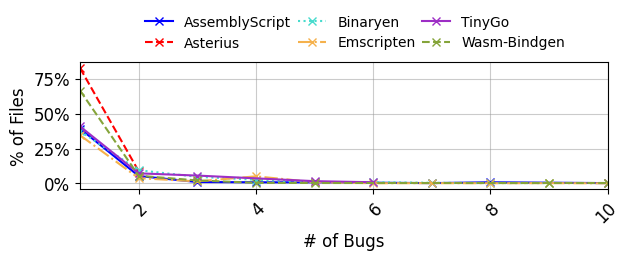

In [4]:
def makeFileDistributionFigure(fileDistributonsPerCompiler):
    fig,ax1 = makeStandardFigure(False)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    x_formatter = ScalarFormatter()
    x_formatter.set_scientific(False)
    ax1.xaxis.set_major_formatter(x_formatter)
    
    for compiler in fileDistributionInCompiler.keys():
        bugCounts = fileDistributionInCompiler[compiler]["bugCounts"]
        ratios = fileDistributionInCompiler[compiler]["ratios"]
        xs = [x for x in range(len(bugCounts))]
        ax1.plot(bugCounts, ratios,label=makeCompilerLabel(compiler), marker='x') #xs, bugCounts, 
    
    plt.xlabel('# of Bugs', fontsize=FONT_SIZE)
    plt.ylabel('% of Files', fontsize=FONT_SIZE)
    plt.legend(ncol=3, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='medium', edgecolor='white',columnspacing = 0.5)
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    return (fig, ax1)

fileDistributionSQLQuery = '''
     SELECT Repo,Totals, COUNT(Filename), MAX(NumberOfFilesInRepo), COUNT(Filename)/ MAX(NumberOfFilesInRepo) * 100 AS Ratio FROM (
        SELECT b.Repo, Filename, COUNT(IssueID) As Totals, NumberOfFilesInRepo FROM webassembly_bugs.github_bug_files_changed a
        INNER JOIN webassembly_bugs.studydataset_issta2021 b ON a.IssueID = b.ID
        INNER JOIN (
            SELECT Repo, COUNT(*) As NumberOfFilesInRepo FROM webassembly_bugs.github_bug_files_changed
            INNER JOIN webassembly_bugs.studydataset_issta2021 ON webassembly_bugs.github_bug_files_changed.IssueID = webassembly_bugs.studydataset_issta2021.ID
            WHERE IsRedundant = 0
            AND Filename NOT LIKE '%tests/%'
            AND Filename NOT LIKE '%examples/%'
            AND Filename NOT LIKE '%.md'
            AND Filename NOT LIKE '%.yml'
            AND Filename NOT LIKE '%.yaml'
            AND Filename NOT LIKE '%.toml'
            AND Filename NOT LIKE '%.txt'
            AND Filename NOT LIKE '%.map'
            AND Filename NOT LIKE 'AUTHORS'
            AND Filename NOT LIKE 'NOTICE' 
            AND Filename NOT LIKE 'package.json'
            AND Filename NOT LIKE 'yarn.lock'
            GROUP BY Repo
        ) c ON b.Repo = c.Repo
        WHERE IsRedundant = 0
        AND Filename NOT LIKE '%tests/%'
        AND Filename NOT LIKE '%examples/%'
        AND Filename NOT LIKE '%.md'
        AND Filename NOT LIKE '%.yml'
        AND Filename NOT LIKE '%.yaml'
        AND Filename NOT LIKE '%.toml'
        AND Filename NOT LIKE '%.txt'
        AND Filename NOT LIKE '%.map'
        AND Filename NOT LIKE 'AUTHORS'
        AND Filename NOT LIKE 'NOTICE' 
        AND Filename NOT LIKE 'package.json'
        AND Filename NOT LIKE 'yarn.lock'
        GROUP BY b.Repo, Filename,NumberOfFilesInRepo
    ) x 
    WHERE Totals <= 10
    GROUP BY Repo,Totals
    ORDER BY Repo,Totals,Ratio ASC
'''


fileDistributionInCompiler = dict()

cursor.execute(fileDistributionSQLQuery)
fileDistributionResults = cursor.fetchall()
for row in fileDistributionResults:
    compiler = row[0]
    bugsCount = row[1]
    ratio= row[4]
    if compiler not in fileDistributionInCompiler.keys():
        fileDistributionInCompiler[compiler] = {"bugCounts": [], "ratios": []}
    fileDistributionInCompiler[compiler]["bugCounts"].append(bugsCount) 
    fileDistributionInCompiler[compiler]["ratios"].append(ratio)

fig,ax1 = makeFileDistributionFigure(fileDistributionInCompiler)
fig.savefig('bugs_file_distribution_per_compiler.png' , dpi=500, bbox_inches = "tight")
fig.show()


\begin{table}[H]
\begin{tabular}{@{}cccccc@{}}
\hline
Compiler & Mean & Median & SD & Min & Max \\ \hline \hline
AssemblyScript & 9.10 & 4.00 & 14.32 & 0.00 & 95.00 \\ 
Asterius & 6.50 & 2.00 & 8.60 & 0.00 & 21.00 \\ 
Binaryen & 7.29 & 0.00 & 13.95 & 0.00 & 70.00 \\ 
Emscripten & 3.84 & 0.00 & 9.68 & 0.00 & 91.00 \\ 
TinyGo & 11.88 & 6.00 & 16.44 & 0.00 & 67.00 \\ 
Wasm-Bindgen & 9.15 & 2.00 & 14.74 & 0.00 & 96.00 \\ 

 \hline
\end{tabular}
\end{table}



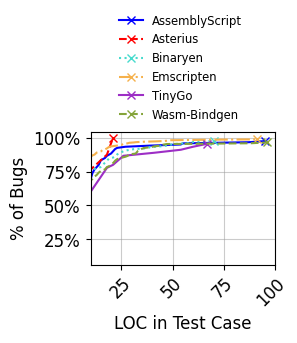

In [5]:
def makeTestCaseLOCFigure(testCaseDistributionPerCompiler):
    MAX_LENGTH = 10
    
    fig,ax1 = makeStandardFigure(False, useNarrow=True)
    # ax1.set_xscale('log')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    x_formatter = ScalarFormatter()
    x_formatter.set_scientific(False)
    ax1.xaxis.set_major_formatter(x_formatter)
    for compiler in testCaseDistributionPerCompiler.keys():
        locCounts = testCaseDistributionPerCompiler[compiler]["locCounts"]
        ratios = testCaseDistributionPerCompiler[compiler]["ratios"]
        xs = [x for x in range(len(locCounts))]
        ax1.plot(locCounts, ratios,label=makeCompilerLabel(compiler), marker='x',markevery=[-1]) #xs, bugCounts, 
   
    
    plt.xlim(10, 100)
    plt.xlabel('LOC in Test Case', fontsize=FONT_SIZE)
    plt.ylabel('% of Bugs', fontsize=FONT_SIZE)
    plt.legend(ncol=1, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='small', edgecolor='white',columnspacing = 0.4)
    
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    
    return (fig, ax1)

testCaseLOCRatioQuery = '''
    SELECT a.Repo, ABS(TestCaseLOC), COUNT(ID), b.TotalBugs, COUNT(ID) / MAX(b.TotalBugs) * 100 AS Ratio
    FROM webassembly_bugs.studydataset_issta2021 a
    INNER JOIN (
        SELECT Repo, COUNT(*) AS TotalBugs 
        FROM  webassembly_bugs.studydataset_issta2021 
        WHERE IsRedundant = 0
        GROUP BY Repo
    ) b ON a.Repo = b.Repo
     WHERE TestCaseLOC < 100
    AND IsRedundant = 0
    GROUP BY Repo, ABS(TestCaseLOC)
    ORDER BY Repo, ABS(TestCaseLOC) ASC;
''' 

testCaseLOCRatioInCompiler = dict()

cursor.execute(testCaseLOCRatioQuery)
testCaseLOCDistributionResults = cursor.fetchall()
runningCount = 0

for row in testCaseLOCDistributionResults:
    compiler = row[0]
    locCount = row[1]
    ratio= row[4]
    if compiler not in testCaseLOCRatioInCompiler.keys():
        runningCount = 0
        testCaseLOCRatioInCompiler[compiler] = {"locCounts": [], "ratios": []}
    testCaseLOCRatioInCompiler[compiler]["locCounts"].append(locCount) 
    testCaseLOCRatioInCompiler[compiler]["ratios"].append(ratio + runningCount)
    runningCount += ratio
fig,ax1 = makeTestCaseLOCFigure(testCaseLOCRatioInCompiler)
fig.savefig('bugs_test_case_loc_dist.png' , dpi=500, bbox_inches = "tight")

fig.show()

def getStatsTable():
    statsQuery = '''
        SELECT a.Repo, TestCaseLOC
        FROM webassembly_bugs.studydataset_issta2021 a
        WHERE TestCaseLOC < 100
        AND IsRedundant = 0
        ORDER BY Repo, TestCaseLOC ASC
        '''
    tableStatsString= ''
    statsDict = dict()
    cursor.execute(statsQuery)
    statsResults = cursor.fetchall()
    for row in statsResults:
        compiler = row[0]
        value = row[1]
        if compiler not in statsDict.keys():
            statsDict[compiler] = {"values": []}
        statsDict[compiler]["values"].append(value)
    for compiler in statsDict.keys():
        values = statsDict[compiler]["values"]
        compilerStats = getStats(values)
        tableStatsString += (makeCompilerLabel(compiler) +' &' + ' %s & %s & %s & %s & %s \\\\ \n'% compilerStats)
    return statsTableTemplate % (tableStatsString)
print(getStatsTable())


\begin{table}[H]
\begin{tabular}{@{}cccccc@{}}
\hline
Compiler & Mean & Median & SD & Min & Max \\ \hline \hline
AssemblyScript & 216.49 & 28.50 & 618.03 & 0.00 & 4,826.00 \\ 
Asterius & 78.62 & 42.00 & 84.24 & 3.00 & 209.00 \\ 
Binaryen & 311.06 & 12.00 & 2,822.08 & 0.00 & 32,141.00 \\ 
Emscripten & 279.53 & 6.00 & 2,826.62 & 0.00 & 51,439.00 \\ 
TinyGo & 47.91 & 32.00 & 57.21 & 1.00 & 241.00 \\ 
Wasm-Bindgen & 77.72 & 11.00 & 319.17 & 0.00 & 3,846.00 \\ 

 \hline
\end{tabular}
\end{table}



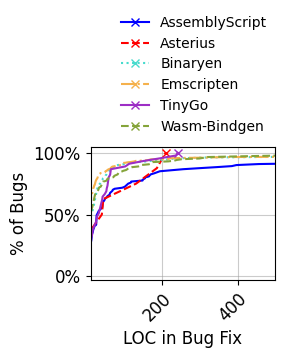

In [6]:
def makeBugFixLOCFigure(bugFixLOCDistributionPerCompiler):
    
    fig,ax1 = makeStandardFigure(False, useNarrow=True)
    # ax1.set_xscale('log')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    x_formatter = ScalarFormatter()
    x_formatter.set_scientific(False)
    ax1.xaxis.set_major_formatter(x_formatter)
    for compiler in bugFixLOCDistributionPerCompiler.keys():
        locCounts = bugFixLOCDistributionPerCompiler[compiler]["locCounts"]
        ratios = bugFixLOCDistributionPerCompiler[compiler]["ratios"]
        xs = [x for x in range(len(locCounts))]
        ax1.plot(locCounts, ratios,label=makeCompilerLabel(compiler), marker='x',markevery=[-1]) #xs, bugCounts, 
    
    plt.xlim(10, 500)
    # plt.xticks(np.arange(start=1,stop=1000,step=100))
    plt.xlabel('LOC in Bug Fix', fontsize=FONT_SIZE)
    plt.ylabel('% of Bugs', fontsize=FONT_SIZE)
    plt.legend(ncol=1, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='medium', edgecolor='white',columnspacing = 0.5)
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    return (fig, ax1)

bugFixLOCRatioQuery = '''
    SELECT a.Repo, ABS(TotalLinesOfCodeChanged), COUNT(ID), b.TotalBugs, COUNT(ID) / MAX(b.TotalBugs) * 100 AS Ratio
    FROM webassembly_bugs.studydataset_issta2021 a
    INNER JOIN (
        SELECT Repo, COUNT(*) AS TotalBugs 
        FROM  webassembly_bugs.studydataset_issta2021
        WHERE IsRedundant = 0 
        GROUP BY Repo
    ) b ON a.Repo = b.Repo
    WHERE IsRedundant = 0
    GROUP BY Repo, ABS(TotalLinesOfCodeChanged)
    ORDER BY Repo, ABS(TotalLinesOfCodeChanged);
''' 

bugFixLOCDistributionPerCompiler = dict()

cursor.execute(bugFixLOCRatioQuery)
bugFixLOCDistributionResults = cursor.fetchall()
runningCount = 0

for row in bugFixLOCDistributionResults:
    compiler = row[0]
    locCount = row[1]
    ratio= row[4]
    if compiler not in bugFixLOCDistributionPerCompiler.keys():
        runningCount = 0
        bugFixLOCDistributionPerCompiler[compiler] = {"locCounts": [], "ratios": []}
    bugFixLOCDistributionPerCompiler[compiler]["locCounts"].append(locCount) 
    bugFixLOCDistributionPerCompiler[compiler]["ratios"].append(ratio + runningCount)
    runningCount += ratio
fig,ax1 = makeBugFixLOCFigure(bugFixLOCDistributionPerCompiler)
fig.savefig('bugs_fix_loc_dist.png' , dpi=500, bbox_inches = "tight")
fig.show()

def getStatsTable():
    statsQuery = '''
        SELECT a.Repo, ABS(TotalLinesOfCodeChanged)
        FROM webassembly_bugs.studydataset_issta2021 a
        WHERE IsRedundant = 0
        ORDER BY Repo;
        '''
    tableStatsString= ''
    statsDict = dict()
    cursor.execute(statsQuery)
    statsResults = cursor.fetchall()
    for row in statsResults:
        compiler = row[0]
        value = row[1]
        if compiler not in statsDict.keys():
            statsDict[compiler] = {"values": []}
        statsDict[compiler]["values"].append(value)
    for compiler in statsDict.keys():
        values = statsDict[compiler]["values"]
        compilerStats = getStats(values)
        tableStatsString += (makeCompilerLabel(compiler) +' &' + ' %s & %s & %s & %s & %s \\\\ \n'% compilerStats)
    return statsTableTemplate % (tableStatsString)
print(getStatsTable())


\begin{table}[H]
\begin{tabular}{@{}cccccc@{}}
\hline
Compiler & Mean & Median & SD & Min & Max \\ \hline \hline
AssemblyScript & 2.77 & 1.50 & 3.16 & 0.00 & 19.00 \\ 
Asterius & 2.25 & 1.50 & 1.75 & 1.00 & 5.00 \\ 
Binaryen & 3.62 & 1.00 & 15.52 & 0.00 & 166.00 \\ 
Emscripten & 2.28 & 1.00 & 11.45 & 0.00 & 235.00 \\ 
TinyGo & 2.58 & 2.00 & 2.34 & 1.00 & 14.00 \\ 
Wasm-Bindgen & 2.25 & 1.00 & 4.81 & 0.00 & 51.00 \\ 

 \hline
\end{tabular}
\end{table}



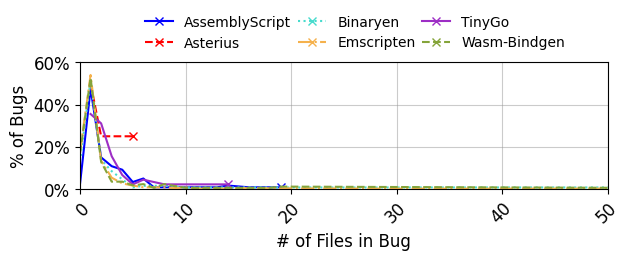

In [17]:
def makeBugFixFileNumberFigure(bugFixFilesDistributionPerCompiler):
    MAX_LENGTH = 100
    
    fig,ax1 = makeStandardFigure(False)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    for compiler in bugFixFilesDistributionPerCompiler.keys():
        fileCounts = bugFixFilesDistributionPerCompiler[compiler]["fileCounts"]
        ratios = bugFixFilesDistributionPerCompiler[compiler]["ratios"]
        if len(fileCounts) > MAX_LENGTH:
            fileCounts = fileCounts[0:MAX_LENGTH]
        if len(ratios) > MAX_LENGTH:
            ratios = ratios[0:MAX_LENGTH]
        xs = [x for x in range(len(fileCounts))]
        ax1.plot(fileCounts, ratios,label=makeCompilerLabel(compiler), marker='x',markevery=[-1]) #xs, bugCounts, 

#     plt.xscale('log')
    plt.ylim(0,60)
    plt.xlim(0,50)
    plt.xlabel('# of Files in Bug', fontsize=FONT_SIZE)
    plt.ylabel('% of Bugs', fontsize=FONT_SIZE)
    plt.legend(ncol=3, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='medium', edgecolor='white',columnspacing = 0.5)
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    return (fig, ax1)

bugFixFilesRatioQuery = '''
    SELECT a.Repo, ABS(FilesforBugFix), COUNT(ID), b.TotalBugs, COUNT(ID) / MAX(b.TotalBugs) * 100 AS Ratio
    FROM webassembly_bugs.studydataset_issta2021 a
    INNER JOIN (
        SELECT Repo, COUNT(*) AS TotalBugs 
        FROM  webassembly_bugs.studydataset_issta2021 
        WHERE IsRedundant = 0
        GROUP BY Repo
    ) b ON a.Repo = b.Repo
    WHERE IsRedundant = 0
    GROUP BY Repo, ABS(FilesforBugFix)
    ORDER BY Repo, ABS(FilesforBugFix)
    ;
''' 

bugFixFilesDistributionPerCompiler = dict()

cursor.execute(bugFixFilesRatioQuery)
bugFixFilesDistributionResults = cursor.fetchall()
runningCount = 0

for row in bugFixFilesDistributionResults:
    compiler = row[0]
    locCount = row[1]
    ratio= row[4]
    if compiler not in bugFixFilesDistributionPerCompiler.keys():
        runningCount = 0
        bugFixFilesDistributionPerCompiler[compiler] = {"fileCounts": [], "ratios": []}
    bugFixFilesDistributionPerCompiler[compiler]["fileCounts"].append(locCount) 
    bugFixFilesDistributionPerCompiler[compiler]["ratios"].append(ratio + runningCount)
    # runningCount += ratio
fig,ax1 = makeBugFixFileNumberFigure(bugFixFilesDistributionPerCompiler)
fig.savefig('bugs_fix_file_count_dist.png' , dpi=500, bbox_inches = "tight")
fig.show()

def getStatsTable():
    statsQuery = '''
           SELECT a.Repo, ABS(FilesforBugFix)
            FROM webassembly_bugs.studydataset_issta2021 a
            WHERE IsRedundant = 0
            ORDER BY Repo;
        '''
    tableStatsString= ''
    statsDict = dict()
    cursor.execute(statsQuery)
    statsResults = cursor.fetchall()
    for row in statsResults:
        compiler = row[0]
        value = row[1]
        if compiler not in statsDict.keys():
            statsDict[compiler] = {"values": []}
        statsDict[compiler]["values"].append(value)
    for compiler in statsDict.keys():
        values = statsDict[compiler]["values"]
        compilerStats = getStats(values)
        tableStatsString += (makeCompilerLabel(compiler) +' &' + ' %s & %s & %s & %s & %s \\\\ \n'% compilerStats)
    return statsTableTemplate % (tableStatsString)
print(getStatsTable())


\begin{table}[H]
\begin{tabular}{@{}cccccc@{}}
\hline
Compiler & Mean & Median & SD & Min & Max \\ \hline \hline
AssemblyScript & 46.84 & 5.00 & 102.04 & 0.00 & 472.00 \\ 
Asterius & 16.88 & 1.50 & 39.76 & 0.00 & 115.00 \\ 
Binaryen & 22.01 & 2.00 & 72.62 & 0.00 & 447.00 \\ 
Emscripten & 184.16 & 10.00 & 349.53 & 0.00 & 1,532.00 \\ 
TinyGo & 42.60 & 11.00 & 59.07 & 0.00 & 252.00 \\ 
Wasm-Bindgen & 34.81 & 3.00 & 110.87 & 0.00 & 907.00 \\ 

 \hline
\end{tabular}
\end{table}



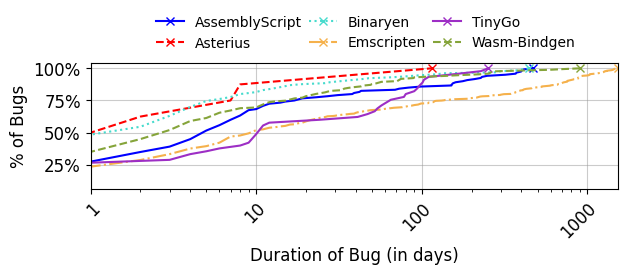

In [19]:
def makeDurationFigure(durationPerCompiler):
    fig,ax1 = makeStandardFigure(False)
    ax1.set_xscale('log')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    x_formatter = ScalarFormatter()
    x_formatter.set_scientific(False)
    ax1.xaxis.set_major_formatter(x_formatter)
    for compiler in durationPerCompiler.keys():
        durations = durationPerCompiler[compiler]["durations"]
        ratios = durationPerCompiler[compiler]["ratios"]
        xs = [x for x in range(len(durations))]
        ax1.plot(durations, ratios,label=makeCompilerLabel(compiler), marker='x',markevery=[-1]) #xs, bugCounts, 
    
    plt.xlabel('Duration of Bug (in days)', fontsize=FONT_SIZE)
    plt.ylabel('% of Bugs', fontsize=FONT_SIZE)
    plt.legend(ncol=3, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='medium', edgecolor='white',columnspacing = 0.5)
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    return (fig, ax1)

durationRatioQuery = '''
SELECT a.Repo,DateDiff(ClosedDate,CreatedDate) As Duration,  COUNT(ID), MAX(b.TotalBugs), COUNT(ID)/ MAX(b.TotalBugs) * 100 As Ratio
FROM webassembly_bugs.studydataset_issta2021 a
INNER JOIN (
	SELECT Repo, COUNT(*) AS TotalBugs 
	FROM  webassembly_bugs.studydataset_issta2021 
    WHERE IsRedundant = 0
	GROUP BY Repo
) b ON a.Repo = b.Repo
WHERE IsRedundant = 0
GROUP BY Repo,DateDiff(ClosedDate,CreatedDate)
ORDER BY Repo,Duration;
''' 

durationPerCompiler = dict()

cursor.execute(durationRatioQuery)
durationResults = cursor.fetchall()
runningCount = 0

for row in durationResults:
    compiler = row[0]
    duration = row[1]
    ratio= row[4]
    if compiler not in durationPerCompiler.keys():
        runningCount = 0
        durationPerCompiler[compiler] = {"durations": [], "ratios": []}
    durationPerCompiler[compiler]["durations"].append(duration) 
    durationPerCompiler[compiler]["ratios"].append(ratio + runningCount)
    runningCount += ratio
fig,ax1 = makeDurationFigure(durationPerCompiler)
fig.savefig('bugs_duration_dist.png' , dpi=500, bbox_inches = "tight")
fig.show()

def getDurationStatsTable():
    durationStatsQuery = '''
        SELECT a.Repo, DateDiff(ClosedDate,CreatedDate) As Duration
        FROM webassembly_bugs.studydataset_issta2021 a
        WHERE IsRedundant = 0
        ORDER BY Repo,Duration;
        '''
    tableStatsString= ''
    statsDict = dict()
    cursor.execute(durationStatsQuery)
    durationResults = cursor.fetchall()
    for row in durationResults:
        compiler = row[0]
        duration = row[1]
        if compiler not in statsDict.keys():
            statsDict[compiler] = {"durations": []}
        statsDict[compiler]["durations"].append(duration)
    for compiler in statsDict.keys():
        durations = statsDict[compiler]["durations"]
        compilerStats = getStats(durations)
        tableStatsString += (makeCompilerLabel(compiler) +' &' + ' %s & %s & %s & %s & %s \\\\ \n'% compilerStats)
    return statsTableTemplate % (tableStatsString)
print(getDurationStatsTable())


In [7]:
selectImpactCategoriesQuery = '''
SELECT ImpactCategory, COUNT(*) AS Totals FROM webassembly_bugs.studydataset_issta2021 si 
WHERE IsRedundant = 0
AND ImpactCategory <> 'Fixing other issues'
GROUP BY ImpactCategory
ORDER BY Totals  DESC, ImpactCategory
'''

impactCategoryTableRows = ''
cursor.execute(selectImpactCategoriesQuery)
impactCategoryResults = cursor.fetchall()

totals
for row in impactCategoryResults:
    impactCategory = row[0]
    total = row[1]
    impactCategoryTableRows += '%s & %s \\\\ \n' % (impactCategory,total)

print('''
\\begin{table}[H]
\\begin{tabular}{@{}ll@{}}
\\hline
Impact Category & Count \\\\ \\hline \\hline
%s
 \\hline
\\end{tabular}
\\end{table}
''' % (impactCategoryTableRows))



\begin{table}[H]
\begin{tabular}{@{}ll@{}}
\hline
Impact Category & Count \\ \hline \hline
Compile Error & 312 \\ 
Build Error & 140 \\ 
Other Runtime Error & 135 \\ 
Crash & 77 \\ 
Incorrect Functionality & 77 \\ 
Linker Error & 22 \\ 
Code Size Regression & 14 \\ 
Fail to Instantiate & 12 \\ 
Data Corruption & 10 \\ 
Performance Degradation & 5 \\ 
Hang & 2 \\ 

 \hline
\end{tabular}
\end{table}



In [4]:
repoImpactCountsQuery = '''
SELECT Repo,ImpactCategory, COUNT(*) FROM webassembly_bugs.studydataset_issta2021 si 
WHERE IsRedundant = 0
AND ImpactCategory <> 'Fixing other issues'
GROUP BY Repo, ImpactCategory 
ORDER BY Repo, ImpactCategory;
'''

distinctImpacts = []
cursor.execute(repoImpactCountsQuery)
repoImpactResults = cursor.fetchall()
compilerImpactCounts = {}

for row in repoImpactResults:
    compiler = row[0]
    impact = row[1]
    count = row[2]
    if compiler not in compilerImpactCounts.keys():
        compilerImpactCounts[compiler] = {}
    if impact not in distinctImpacts:
        distinctImpacts.append(impact)
    compilerImpactCounts[compiler][impact] = count

distinctImpacts.sort()

impactCountFile = open('./impactCountsPerCompiler.csv', 'a')
titleStr=' ,'
for compiler in compilerImpactCounts.keys():
    titleStr += f'{compiler},'
titleStr += 'Totals,'
print(titleStr, file=impactCountFile)


totalInCompiler = {}
for impact in distinctImpacts:
    rowStr = f'{impact},'
    totalInImpact = 0
    for compiler in compilerImpactCounts.keys():
        if impact not in compilerImpactCounts[compiler].keys():
            compilerImpact = 0
        else:    
            compilerImpact = compilerImpactCounts[compiler][impact]
        totalInImpact += compilerImpact
        if compiler not in totalInCompiler.keys():
            totalInCompiler[compiler] = 0
        totalInCompiler[compiler] += compilerImpact
        rowStr += f'{compilerImpact},'
    rowStr += f'{totalInImpact},'
    print(rowStr, file=impactCountFile)

totalCompilerStr = 'Total,'
for compiler in compilerImpactCounts.keys():
    compilerCount = totalInCompiler[compiler]
    totalCompilerStr += f'{compilerCount},'
print(totalCompilerStr, file=impactCountFile)
impactCountFile.close()


\begin{table}[H]
\begin{tabular}{@{}cccccc@{}}
\hline
Compiler & Mean & Median & SD & Min & Max \\ \hline \hline
AssemblyScript & 5.60 & 2.00 & 11.18 & 1.00 & 69.00 \\ 
Asterius & 2.50 & 2.50 & 1.05 & 1.00 & 4.00 \\ 
Binaryen & 9.70 & 2.00 & 38.69 & 1.00 & 331.00 \\ 
Emscripten & 6.51 & 2.00 & 22.39 & 1.00 & 226.00 \\ 
TinyGo & 3.14 & 2.00 & 3.05 & 1.00 & 14.00 \\ 
Wasm-Bindgen & 5.54 & 2.00 & 10.25 & 1.00 & 69.00 \\ 

 \hline
\end{tabular}
\end{table}



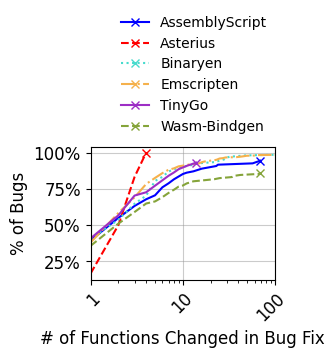

In [3]:
def makeBugFixFunctionNumberFigure(bugFixFilesDistributionPerCompiler):
    MAX_LENGTH = 100
    
    fig,ax1 = makeStandardFigure(False, useNarrow=True)
    ax1.set_xscale('log')
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    x_formatter = ScalarFormatter()
    x_formatter.set_scientific(False)
    ax1.xaxis.set_major_formatter(x_formatter)
    for compiler in bugFixFilesDistributionPerCompiler.keys():
        fileCounts = bugFixFilesDistributionPerCompiler[compiler]["fileCounts"]
        ratios = bugFixFilesDistributionPerCompiler[compiler]["ratios"]
        if len(fileCounts) > MAX_LENGTH:
            fileCounts = fileCounts[0:MAX_LENGTH]
        if len(ratios) > MAX_LENGTH:
            ratios = ratios[0:MAX_LENGTH]
        xs = [x for x in range(len(fileCounts))]
        ax1.plot(fileCounts, ratios,label=makeCompilerLabel(compiler), marker='x',markevery=[-1]) #xs, bugCounts, 

    # plt.xscale('linear')
    # plt.xticks(np.arange(start=10, stop=100,step=10))
    # plt.xticks(np.logspace(start=0,stop=100))
    plt.xticks(list(plt.xticks()[0]) + [0.0])
    plt.xlim(0.0, 100)
    plt.xlabel('# of Functions Changed in Bug Fix', fontsize=FONT_SIZE)
    plt.ylabel('% of Bugs', fontsize=FONT_SIZE)
    plt.legend(ncol=1, bbox_to_anchor=(0.1, 1),
                  loc='lower left', fontsize='medium', edgecolor='white',columnspacing = 0.5)
    plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.5)

    # # Show the minor grid lines with very faint and almost transparent grey lines
    # plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    return (fig, ax1)

old_bugFixFunctionRatioQuery = '''
    SELECT xi.Repo, xi.NumberOfFunctionsAffectedByIssue, COUNT(xi.IssueID),  MAX(xb.Totals), COUNT(xi.IssueID) / MAX(xb.Totals) * 100 AS Ratio
FROM
(
	SELECT IssueID, MAX(Repo) AS Repo, COUNT(*) AS NumberOfFunctionsAffectedByIssue
	FROM webassembly_bugs.github_bug_fix_function_names_affect b
	INNER JOIN  webassembly_bugs.studydataset_issta2021 a On a.ID = b.IssueID
	WHERE IsRedundant = 0
	GROUP BY IssueID
) xi 
INNER JOIN (
	SELECT Repo, COUNT(ID) As Totals
	FROM  webassembly_bugs.studydataset_issta2021
	WHERE IsRedundant = 0
	AND ID IN (
		SELECT IssueID
		FROM webassembly_bugs.github_bug_fix_function_names_affect
	)
	GROUP BY Repo
) xb On xi.Repo = xb.Repo 
 WHERE NumberOfFunctionsAffectedByIssue BETWEEN 10 AND 400
GROUP BY xi.Repo, xi.NumberOfFunctionsAffectedByIssue
ORDER BY Repo, xi.NumberOfFunctionsAffectedByIssue ASC;
''' 

bugFixFunctionRatioQuery = '''
SELECT xi.Repo, xi.BugFixNumberOfFunctions, COUNT(xi.ID),  MAX(xb.Totals), COUNT(xi.ID) / MAX(xb.Totals) * 100 AS Ratio
FROM webassembly_bugs.studydataset_issta2021 xi 
INNER JOIN (
	SELECT Repo, COUNT(ID) As Totals
	FROM  webassembly_bugs.studydataset_issta2021
	WHERE IsRedundant = 0
	AND ID IN (
		SELECT IssueID
		FROM webassembly_bugs.github_bug_fix_function_names_affect
	)
	GROUP BY Repo
) xb On xi.Repo = xb.Repo 
WHERE IsRedundant =0
AND BugFixNumberOfFunctions IS NOT NULL	
GROUP BY xi.Repo, BugFixNumberOfFunctions
ORDER BY Repo, BugFixNumberOfFunctions ASC;
'''

bugFixFunctionsDistributionPerCompiler = dict()

cursor.execute(bugFixFunctionRatioQuery)
bugFixFilesDistributionResults = cursor.fetchall()
runningCount = 0

for row in bugFixFilesDistributionResults:
    compiler = row[0]
    functionCount = row[1]
    ratio= row[4]
    if compiler not in bugFixFunctionsDistributionPerCompiler.keys():
        runningCount = 0
        bugFixFunctionsDistributionPerCompiler[compiler] = {"fileCounts": [], "ratios": []}
    bugFixFunctionsDistributionPerCompiler[compiler]["fileCounts"].append(functionCount) 
    bugFixFunctionsDistributionPerCompiler[compiler]["ratios"].append(ratio + runningCount)
    runningCount += ratio
fig,ax1 = makeBugFixFunctionNumberFigure(bugFixFunctionsDistributionPerCompiler)
fig.savefig('bugs_fix_function_count_dist.png' , dpi=500, bbox_inches = "tight")
fig.show()

def getRepoFunctionCountStatsTable():
    statsQuery = '''
        SELECT xi.Repo, xi.NumberOfFunctionsAffectedByIssue
        FROM
        (
            SELECT IssueID, MAX(Repo) AS Repo, COUNT(*) AS NumberOfFunctionsAffectedByIssue
            FROM (
                SELECT DISTINCT IssueID, Filename, FunctionName 
                FROM webassembly_bugs.github_bug_fix_function_names_affect
            ) b
            INNER JOIN  webassembly_bugs.studydataset_issta2021 a On a.ID = b.IssueID
            WHERE IsRedundant = 0
            GROUP BY IssueID
        ) xi 
        ORDER BY Repo
        '''
    tableStatsString= ''
    statsDict = dict()
    cursor.execute(statsQuery)
    statsResults = cursor.fetchall()
    for row in statsResults:
        compiler = row[0]
        value = row[1]
        if compiler not in statsDict.keys():
            statsDict[compiler] = {"values": []}
        statsDict[compiler]["values"].append(value)
    for compiler in statsDict.keys():
        values = statsDict[compiler]["values"]
        compilerStats = getStats(values)
        tableStatsString += (makeCompilerLabel(compiler) +' &' + ' %s & %s & %s & %s & %s \\\\ \n'% compilerStats)
    return statsTableTemplate % (tableStatsString)
print(getRepoFunctionCountStatsTable())

AssemblyScript


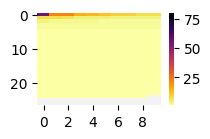

asterius


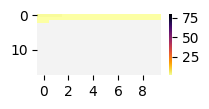

binaryen


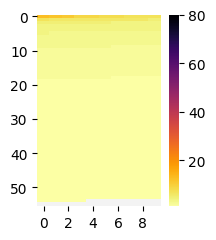

emscripten


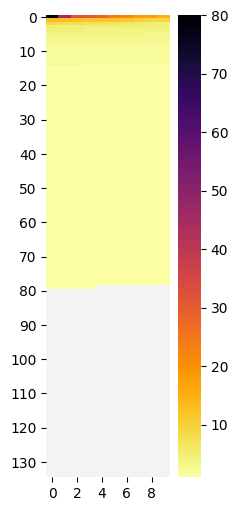

tinygo


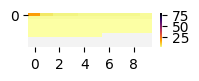

wasm-bindgen


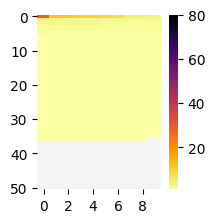

In [87]:
repoFilesQuery = '''
    SELECT Repo,Filename,COUNT(DISTINCT(IssueID)) As Total FROM webassembly_bugs.github_bug_files_changed gbfc
    INNER JOIN webassembly_bugs.studydataset_issta2021 si On si.ID = gbfc.IssueID
    WHERE IsRedundant = 0
    AND Filename NOT LIKE '%tests/%'
    AND Filename NOT LIKE '%examples/%'
    AND Filename NOT LIKE '%.md'
    AND Filename NOT LIKE '%.yml'
    AND Filename NOT LIKE '%.yaml'
    AND Filename NOT LIKE '%.toml'
    AND Filename NOT LIKE '%.txt'
    AND Filename NOT LIKE '%.map'
    AND Filename NOT LIKE 'AUTHORS'
    AND Filename NOT LIKE 'NOTICE' 
    AND Filename NOT LIKE 'package.json'
    AND Filename NOT LIKE 'yarn.lock'
    GROUP BY Repo,Filename
    ORDER BY Repo, Total DESC, Filename
'''

cursor.execute(repoFilesQuery)
compilerFileResults = cursor.fetchall()
compilerFileCounts = {}

for row in compilerFileResults:
    compiler = row[0]
    filename = row[1]
    count = row[2]
    if compiler not in compilerFileCounts.keys():
        compilerFileCounts[compiler] = []
    compilerFileCounts[compiler].append(count)


def convert1DTo2DArray(oneDList,fullRepoFileCount, columns = None):
    oneD = np.array(oneDList)
    upperBoundOf1D =  fullRepoFileCount 
    upperBoundFactors = getFactors(upperBoundOf1D)
    if columns is not None:
        middleDigit = columns
    else:
        middleDigit = upperBoundFactors[len(upperBoundFactors) // 2 - 1 ]
    oneD.resize(upperBoundOf1D)
    twoD = oneD.reshape(-1,middleDigit)
    return twoD

# fullCompilerNumberofFiles = {'emscripten': 6452, 'AssemblyScript': 520, 'asterius':1686,'tinygo':449,'binaryen':712, 'wasm-bindgen': 1831}
fullCompilerNumberofCells = {'emscripten': 6452, 'AssemblyScript': 520, 'asterius':1680,'tinygo':450,'binaryen':710, 'wasm-bindgen': 1830}

maxCompilerNumberOfCells = 0
for compiler  in fullCompilerNumberofCells.keys():
    compilerFileCount = len(compilerFileCounts[compiler])
    fullRepoFileCount = fullCompilerNumberofCells[compiler]
    numberOfEmptyFileCells = (fullRepoFileCount - compilerFileCount) // 10
    numberOfCellsInCompiler = (compilerFileCount + numberOfEmptyFileCells ) // 10 * 10
    if numberOfCellsInCompiler > maxCompilerNumberOfCells:
        maxCompilerNumberOfCells = numberOfCellsInCompiler

STANDARD_INCH_HEGIHT = 6
compilerHeightInches = {}
for compiler  in fullCompilerNumberofCells.keys():
    compilerFileCount = len(compilerFileCounts[compiler])
    fullRepoFileCount = fullCompilerNumberofCells[compiler]
    numberOfEmptyFileCells = (fullRepoFileCount - compilerFileCount) // 10
    numberOfCellsInCompiler = (compilerFileCount + numberOfEmptyFileCells ) // 10 * 10
    ratio = numberOfCellsInCompiler/maxCompilerNumberOfCells
    compilerHeightInches[compiler] = STANDARD_INCH_HEGIHT * ratio#* (ratio if ratio < 1 else 1)

for compiler  in compilerFileCounts.keys():
    print(compiler)
    compilerColumns = {'emscripten': None, 'AssemblyScript': None, 'asterius':None,'tinygo':None,'binaryen':None, 'wasm-bindgen': None}
    counts = compilerFileCounts[compiler]
    compilerColumnNumber = compilerColumns[compiler]
    compilerFigureHeight = compilerHeightInches[compiler]
    compilerFileCount = len(counts)
    fullRepoFileCount = fullCompilerNumberofCells[compiler]
    numberOfEmptyFileCells = (fullRepoFileCount - compilerFileCount) // 10
    numberOfCellsInCompiler = (compilerFileCount + numberOfEmptyFileCells)// 10 * 10
    rectangularCounts = convert1DTo2DArray(counts,numberOfCellsInCompiler,10)
    rectangularCounts = pd.DataFrame(rectangularCounts)
    rectangularCounts= rectangularCounts.dropna()
    # plt.imshow(rectangularCounts, cmap='hot_r',interpolation='antialiased')
    # # plt.show() 
    fig, ax = plt.subplots() 
    # fig = plt.gcf()
    rectangularCounts[rectangularCounts == 0] = np.nan
    # rectangularCounts = np.ma.array(rectangularCounts, mask=(rectangularCounts == 0))
    fig.set_size_inches((2,compilerFigureHeight))
    cmap = cm.inferno_r
    cmap.set_bad('#f3f3f3',1.)
    sns.heatmap(rectangularCounts, yticklabels=10,   ax=ax,cmap=cmap, robust=True, vmin=1, vmax=80)
    plt.yticks(rotation=0) 
    # ax.hlines([3, 6, 9], *ax.get_xlim())
    ax.get_figure().savefig(f'file-heatmap-dist-{compiler}.png' , dpi=500, bbox_inches = "tight")
    plt.show()
    